# Mohamed Saber Ibrahim
# Bench Number: 43865
# Section: 3

## Libraries and Globals

In [449]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
samplingtime = 1/24414  # sampling rate = 24414 Hz
inputfile = 'E:\Learning\College\Fourth Computer\First Semester\Biomedical engineering\Assignments\Assignment2\Data.txt'

## Functions

In [450]:
def readfromfile(inputfile):
    inFile = open(inputfile, 'r')
    lines = inFile.readlines()
    inFile.close()
    return lines

In [451]:
def get_data_time(lines):
    # remove '\n' from eaach line
    values = [line.rstrip('\n') for line in lines]
    samplestime = []
    for i in range(len(values)):
        """ split each line in \t, convert a list into a list of lists """
        values[i] = values[i].split('\t')
        samplestime.append(samplingtime*i*1000)
    # convert our list into a 2D float array in numpy
    arr = np.array(values, dtype=np.float32)
    return arr, samplestime

In [452]:
# NOT USED
def smoothing(values_list, window_size): 
    smoothed = []
    for i in range(len(values_list)):
        smoothed.append(0)
        n = 1
        for j in range(max(i-window_size//2, 0),
                       min(i+window_size//2-1, len(values_list)-1)):
            smoothed[i] += values_list[j]
            n += 1
        smoothed[i] /= n
    return smoothed

In [453]:
# NOT USED
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [454]:
def get_spike(values_electrode, threshold):
    # values_list = movingaverage(values_electrode, 48)
    # values_list = smoothing(values_electrode, 48)
    peaks, _ = find_peaks(values_electrode, height=threshold, distance=48)
    return peaks

In [455]:
def alignement(peaks, original_values):
    aligned = [[] for x in range(len(peaks))]
    for i in range(len(peaks)):
        for j in range(max(peaks[i]-24, 0),
                       min(peaks[i]+24, len(original_values))):
            aligned[i].append(original_values[j])
    return aligned

In [456]:
def plot_data(values, sampletime, figurename, threshold=0, N_samples=-1):
    myfigure = plt.figure(1, figsize=(20, 15))
    plt.plot(sampletime[:N_samples], values[:N_samples])
    if(threshold > 0):
        threshold_list = [threshold for i in range(len(sampletime))]
        plt.plot(sampletime[:N_samples], threshold_list[:N_samples])
    plt.xlabel("Time in msec")
    plt.title(figurename)
    myfigure.savefig(figurename+'.jpg', bbox_inches='tight')
    myfigure.show()
    return

In [457]:
def plot_peaks_with_data(values, sampletime, peaks_list, figurename, N_samples=-1):
    myfigure = plt.figure(2, figsize=(20, 15))
    plt.plot(sampletime[:N_samples], values[:N_samples])
    if(N_samples==-1):
        N_samples = len(sampletime)
    for peakindex in peaks_list:
        if(peakindex <= N_samples):
            plt.plot(samplestime[peakindex], values[peakindex], "X")
    plt.xlabel("Time in msec")
    plt.title(figurename)
    myfigure.savefig(figurename+'.jpg', bbox_inches='tight')
    myfigure.show()
    return
    

In [458]:
def plot_aligned(aligned_list, figurename):
    myfigure = plt.figure(3, figsize=(20, 15))
    aligned_arr = np.array(aligned_list)
    print('Shape of aligned_arr:',aligned_arr.shape)
    N_peaks = aligned_arr.shape[0]
    for k in range(N_peaks):
        plt.plot([i for i in range(48)], [aligned_arr[k, i] for i in range(48)])
    myfigure.savefig(figurename+'.jpg', bbox_inches='tight')
    myfigure.show()
    return

In [459]:
def plot_pca(axis1, axis2, figurename):
    myfigure = plt.figure(4, figsize=(20, 15))
    plt.plot(axis1, axis2,'o')
    plt.title(figurename)
    myfigure.savefig(figurename+'.jpg', bbox_inches='tight')
    myfigure.show()
    return

In [460]:
def plot_kmeans(pca_output, figurename, labels, centers):
    myfigure = plt.figure(5, figsize=(20, 15))
    plt.axis((-0.0002, 0.00025, -0.0002, 0.00025))
    plt.scatter(pca_output[:, 0], pca_output[:, 1], c=labels, cmap='rainbow')
    plt.scatter(centers[:,0] ,centers[:,1], color='black')
    myfigure.savefig(figurename+'.jpg', bbox_inches='tight')
    myfigure.show()
    return

In [461]:
def plot_data_with_stars(values, sampletime, peaks, labels, figurename,N_samples=-1):
    myfigure = plt.figure(6, figsize=(20, 15))
    plt.plot(sampletime[:N_samples], values[:N_samples])
    peaktime = peaks*1000*samplingtime
    peakvalue = np.array([values[peaks[i]] for i in range(len(peaks))])
    index = -1
    if(N_samples!=-1):
        index = 0
        while(peaks[index] <= N_samples):
            index += 1
    plt.scatter(peaktime[:index], peakvalue[:index], c=labels[:index], cmap='rainbow', marker='*')
    myfigure.savefig(figurename+'.jpg', bbox_inches='tight')
    myfigure.show()
    return

In [462]:
def get_templates(aligned_list, kmeans_labels):
    clusters_list = np.unique(kmeans_labels)
    aligned = np.array(aligned_list)
    templates = np.zeros((len(clusters_list), aligned.shape[1]))
    for value in clusters_list:
        n = 0
        for i in range(len(kmeans_labels)):
            if(value == kmeans_labels[i]):
                templates[value] += aligned[i]
                n += 1
        templates[value] /= n
    return templates

__Hints:__
__1- Ignored the smoothing because the peaks found by smoothing not aligned to the original values.__
__2- Got std for the whole samples not only the first 500 samples, it gets better results on clustering Electrode1 with threshold 3.5. Now i have around 3643 peaks, when i use std for 500 samples the peaks = 6192 but while clustering 2 points at the center of the figure clustered into the other group.__

## Codes

**Getting data from file, standard deviations and plotting data**

Std1: 9.790833e-06 
Std2: 7.744702e-06


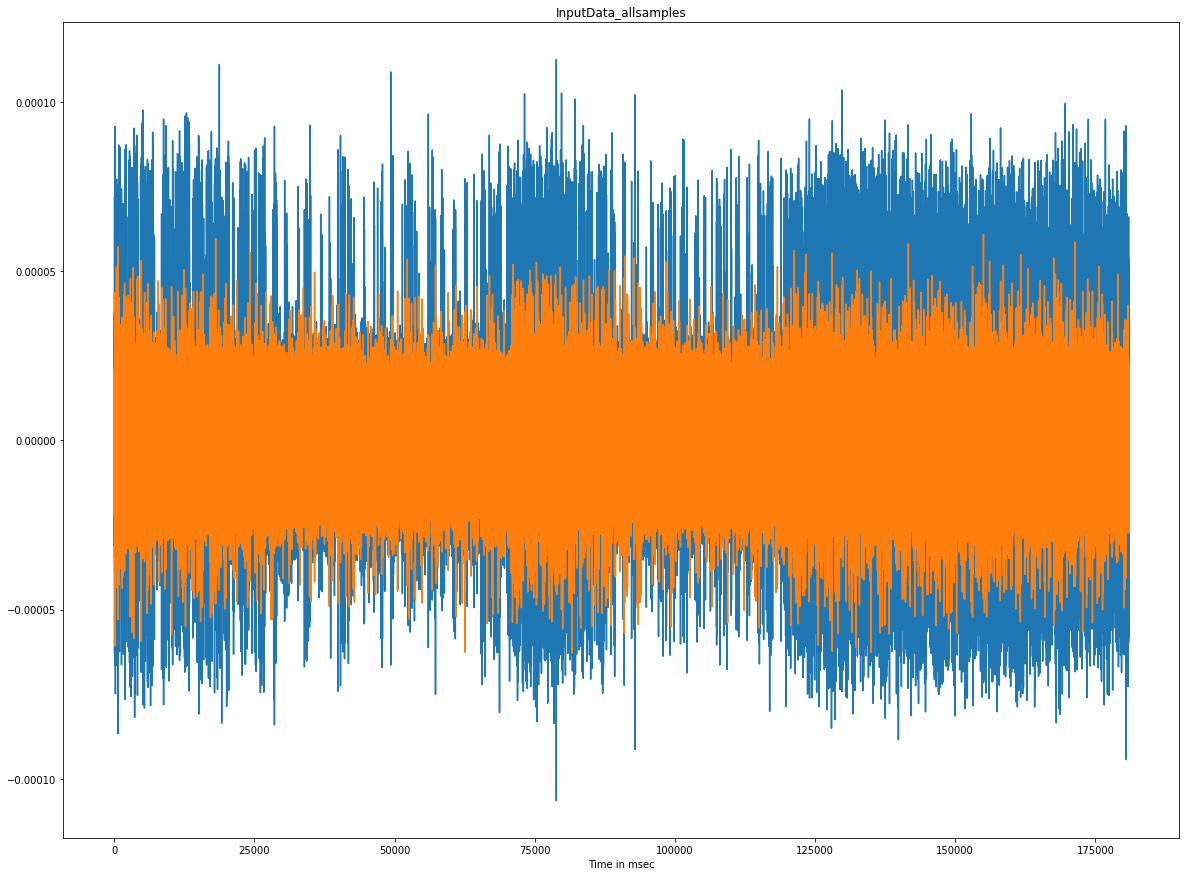

In [463]:
lines = readfromfile(inputfile)
arr, samplestime = get_data_time(lines)
plot_data(arr, samplestime, 'InputData_allsamples')
electrode1_values = arr[:, 0]
electrode2_values = arr[:, 1]
std1 = np.std(electrode1_values[:])  # standard deviation for first electrode
std2 = np.std(electrode2_values[:])  # standard deviation for second electrode
print('Std1:', std1, '\nStd2:', std2)

**Algorithm for Electrode1 with 3.5*std1 threshold**

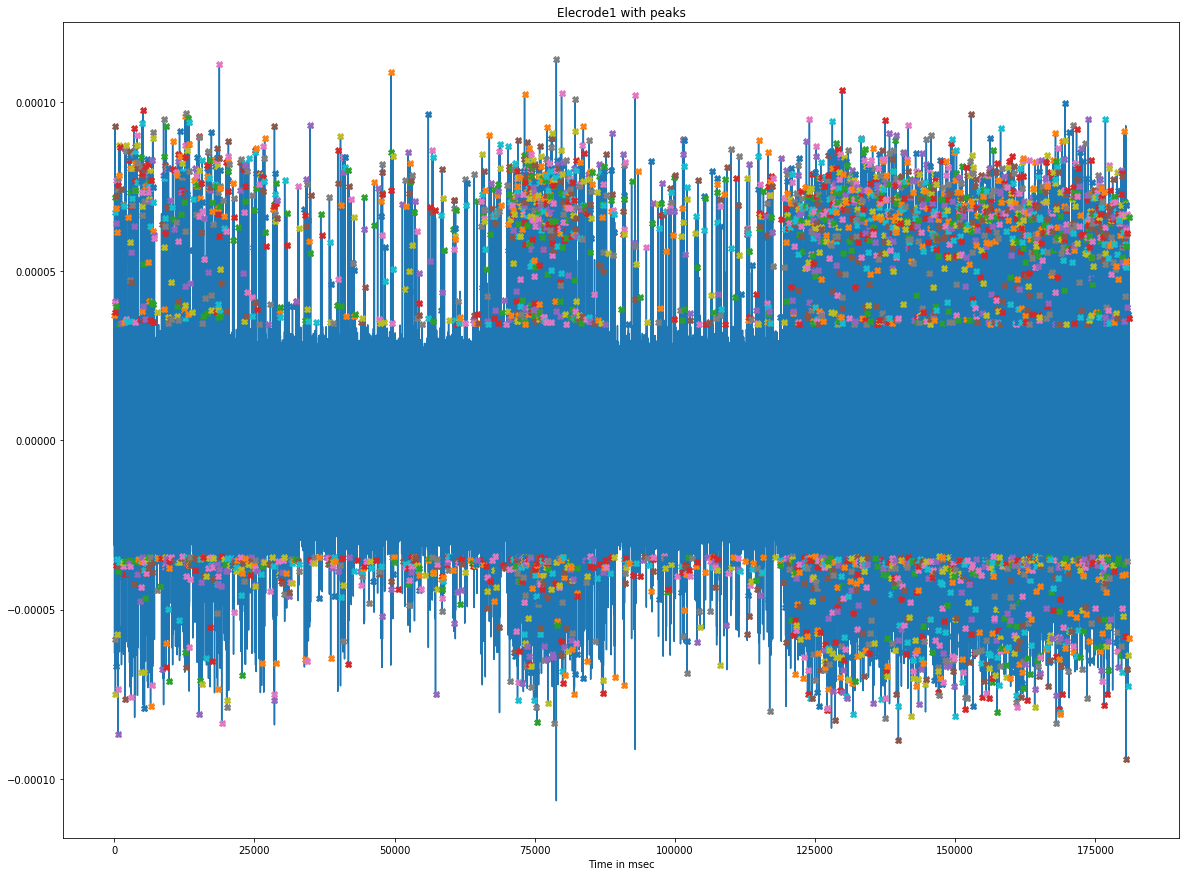

In [464]:
peaksindices_list = get_spike(np.abs(electrode1_values), std1*3.5) # Getting peaks for rectified data
plot_peaks_with_data(electrode1_values, samplestime, peaksindices_list, 'Elecrode1 with peaks')

Shape of aligned_arr: (3643, 48)


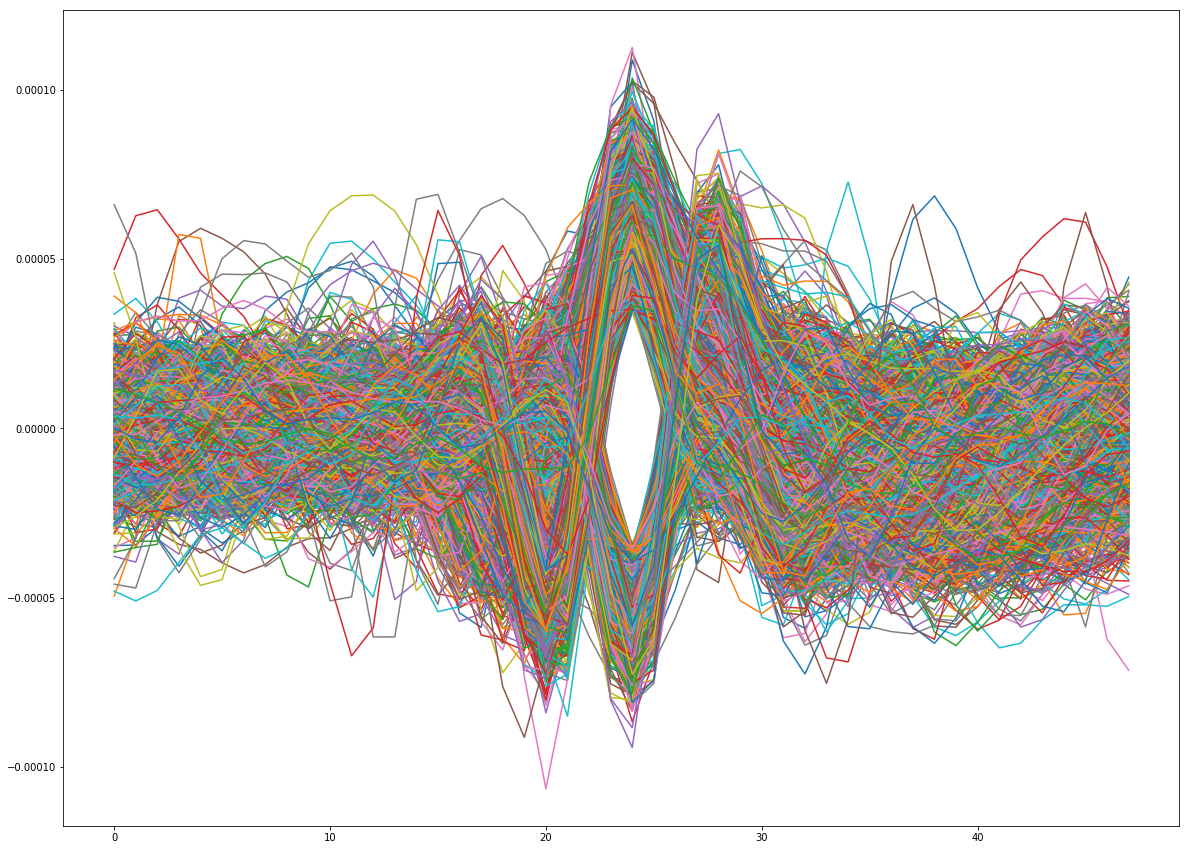

In [465]:
aligned_electrode1_3_5 = alignement(peaksindices_list, electrode1_values)
plot_aligned(aligned_electrode1_3_5, 'aligned_electrode1_3_5')

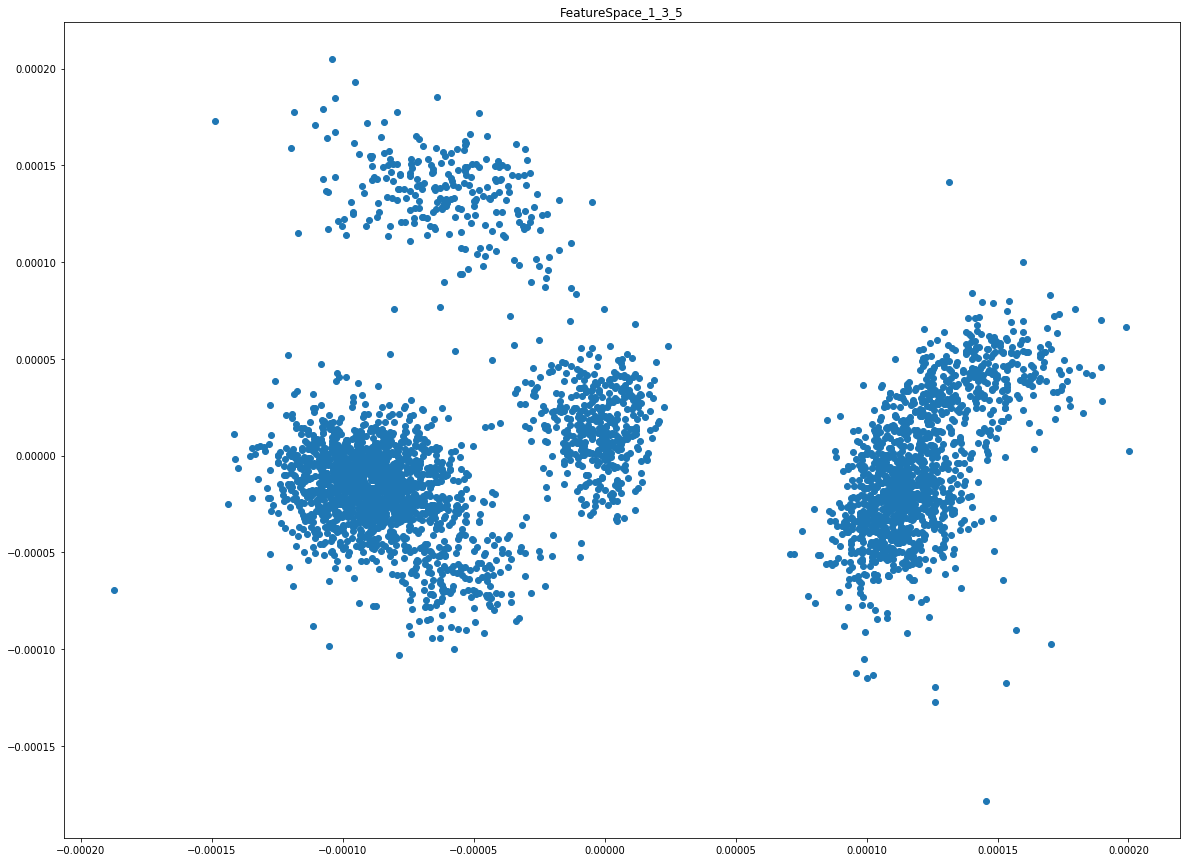

In [466]:
pca = PCA(n_components=2)
FeatureSpace_1_3_5 = pca.fit_transform(aligned_electrode1_3_5)
plot_pca(FeatureSpace_1_3_5[:, 0], FeatureSpace_1_3_5[:, 1], 'FeatureSpace_1_3_5')

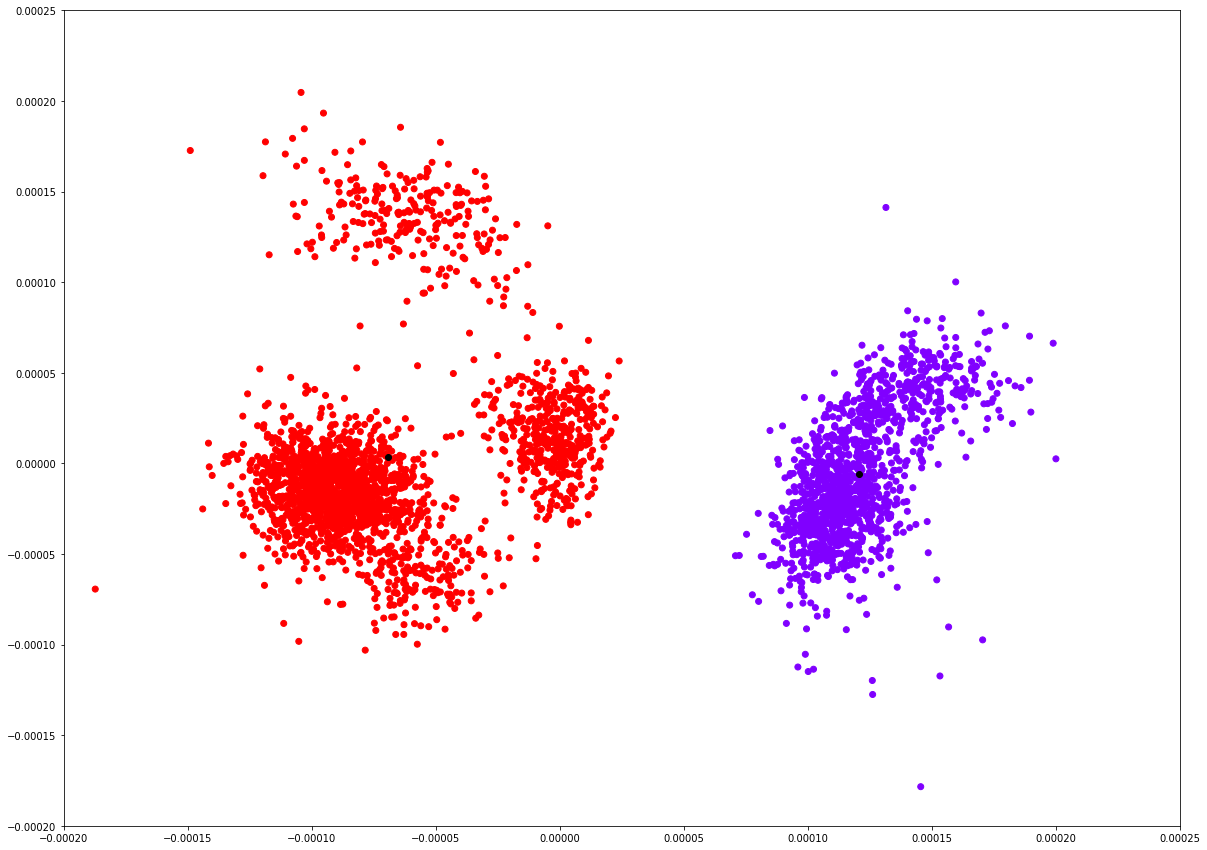

In [467]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(FeatureSpace_1_3_5)
plot_kmeans(FeatureSpace_1_3_5, 'Electrode1_3_5_kmeans', kmeans.labels_, kmeans.cluster_centers_)

Number of detected spikes: 3643


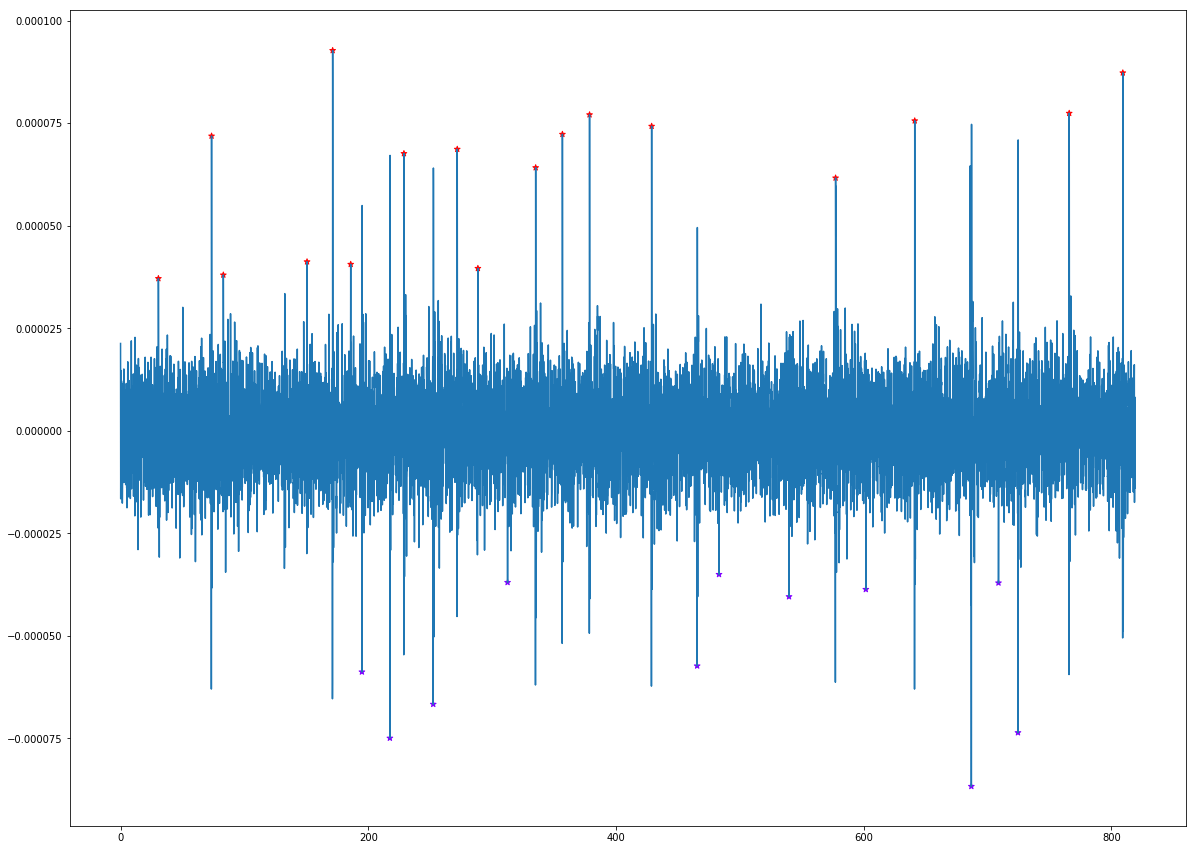

In [468]:
print('Number of detected spikes:',len(kmeans.labels_))
plot_data_with_stars(electrode1_values, samplestime, peaksindices_list, kmeans.labels_, 'DetectedSpikes_1_3_5', 20000)

Shape of aligned_arr: (2, 48)


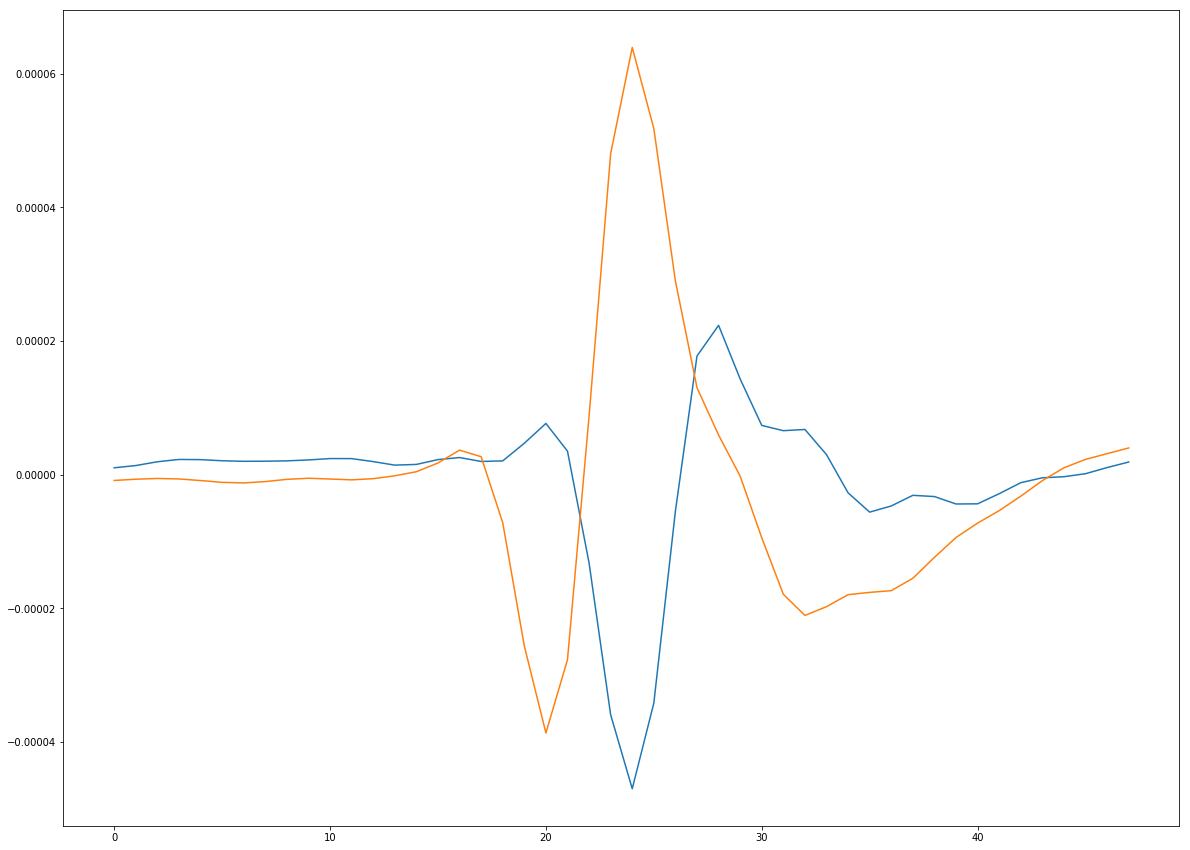

In [469]:
templates_1_3_5 = get_templates(aligned_electrode1_3_5, kmeans.labels_)
plot_aligned(templates_1_3_5, 'templates_1_3_5')

**Algorithm for Electrode1 with 5*std1 threshold**

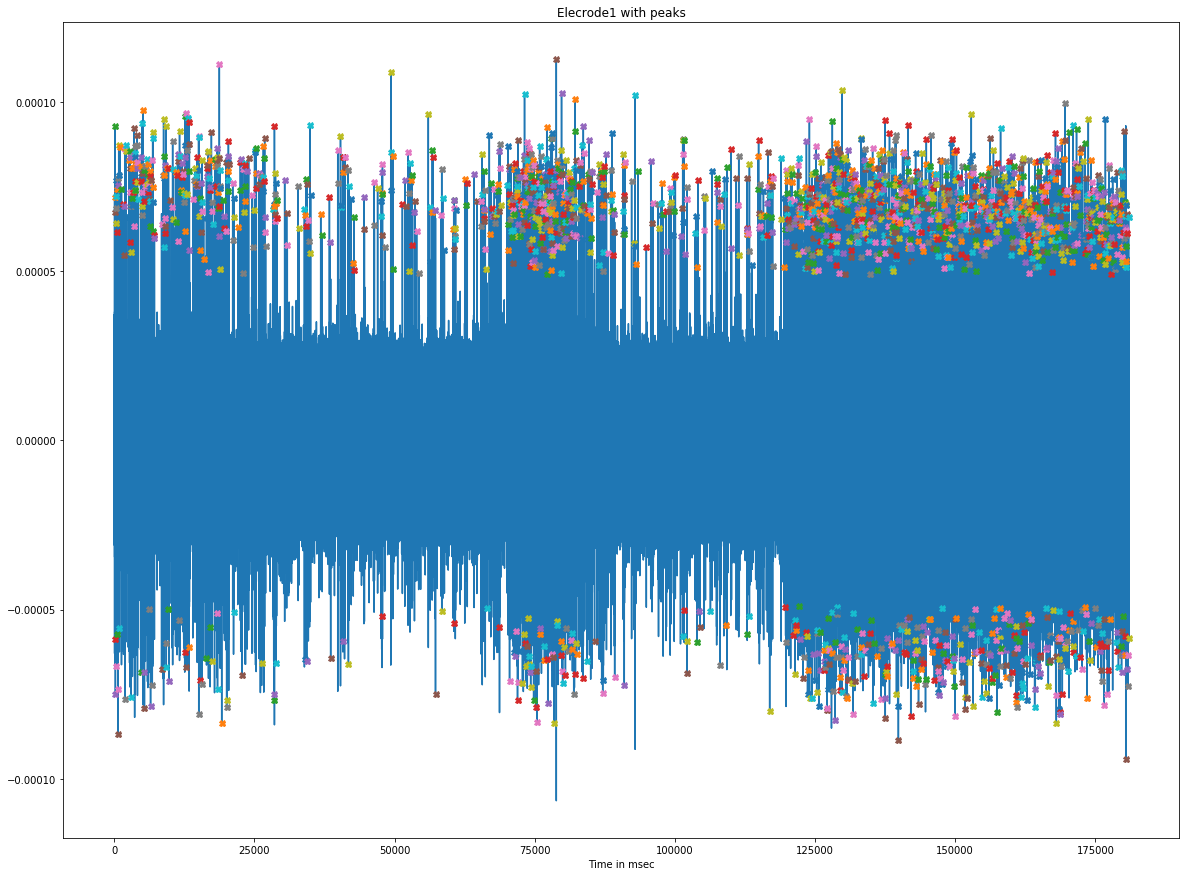

In [470]:
peaksindices_list = get_spike(np.abs(electrode1_values), std1*5) # Getting peaks for rectified data
plot_peaks_with_data(electrode1_values, samplestime, peaksindices_list, 'Elecrode1 with peaks')

Shape of aligned_arr: (2309, 48)


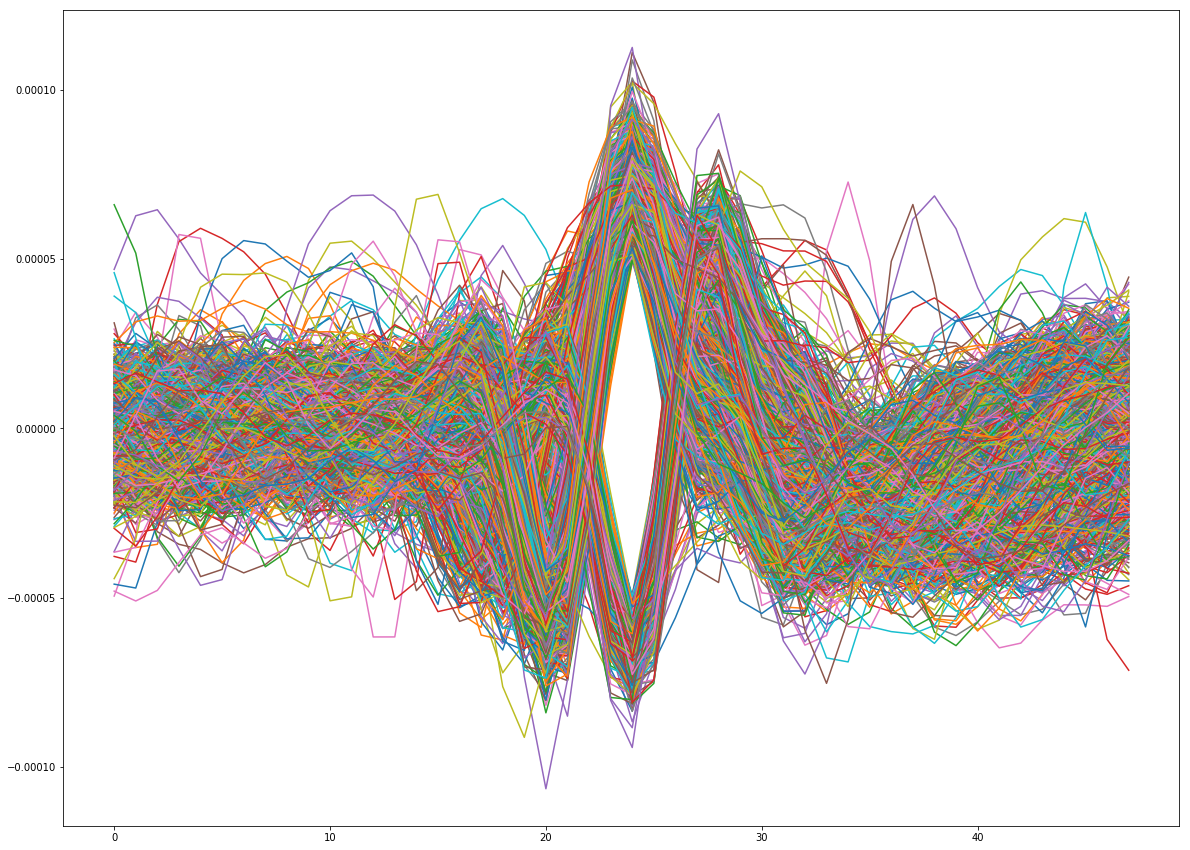

In [471]:
aligned_electrode1_5 = alignement(peaksindices_list, electrode1_values)
plot_aligned(aligned_electrode1_5, 'aligned_electrode1_5')

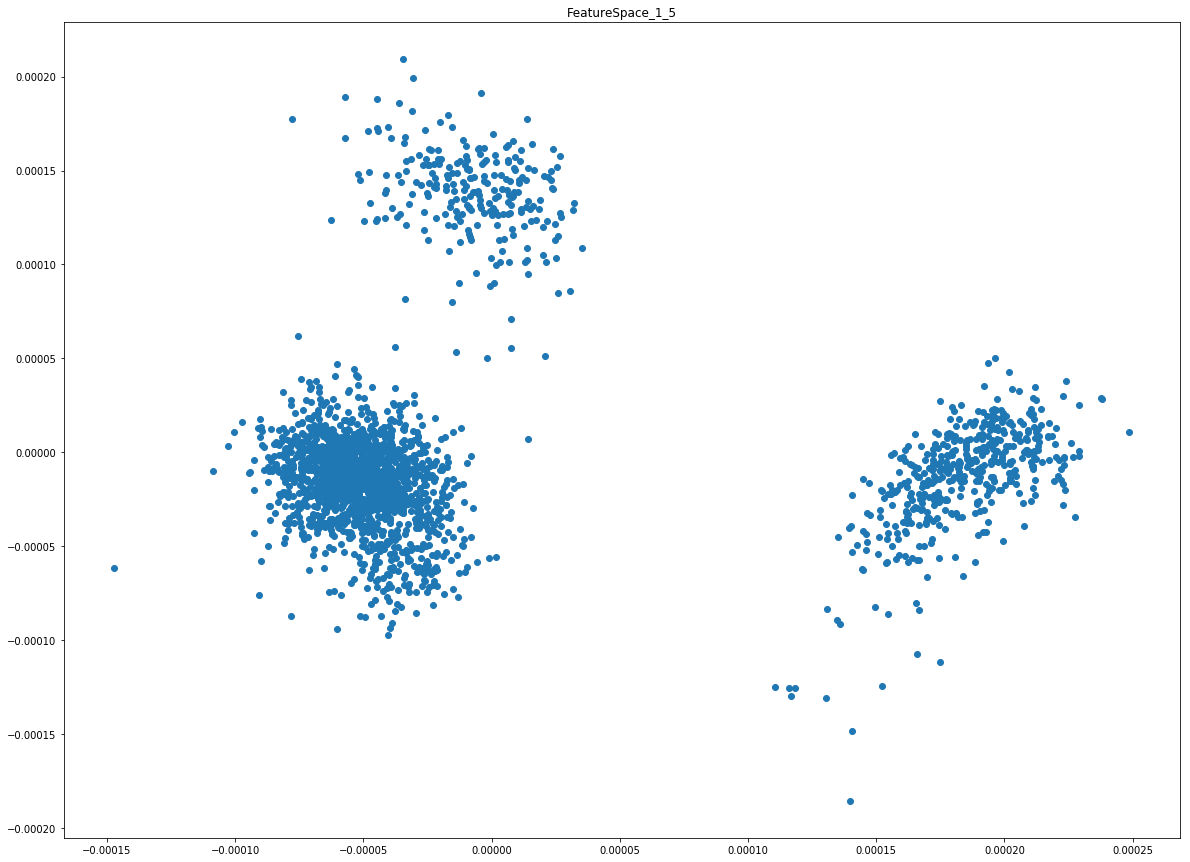

In [472]:
pca = PCA(n_components=2)
FeatureSpace_1_5 = pca.fit_transform(aligned_electrode1_5)
plot_pca(FeatureSpace_1_5[:, 0], FeatureSpace_1_5[:, 1], 'FeatureSpace_1_5')

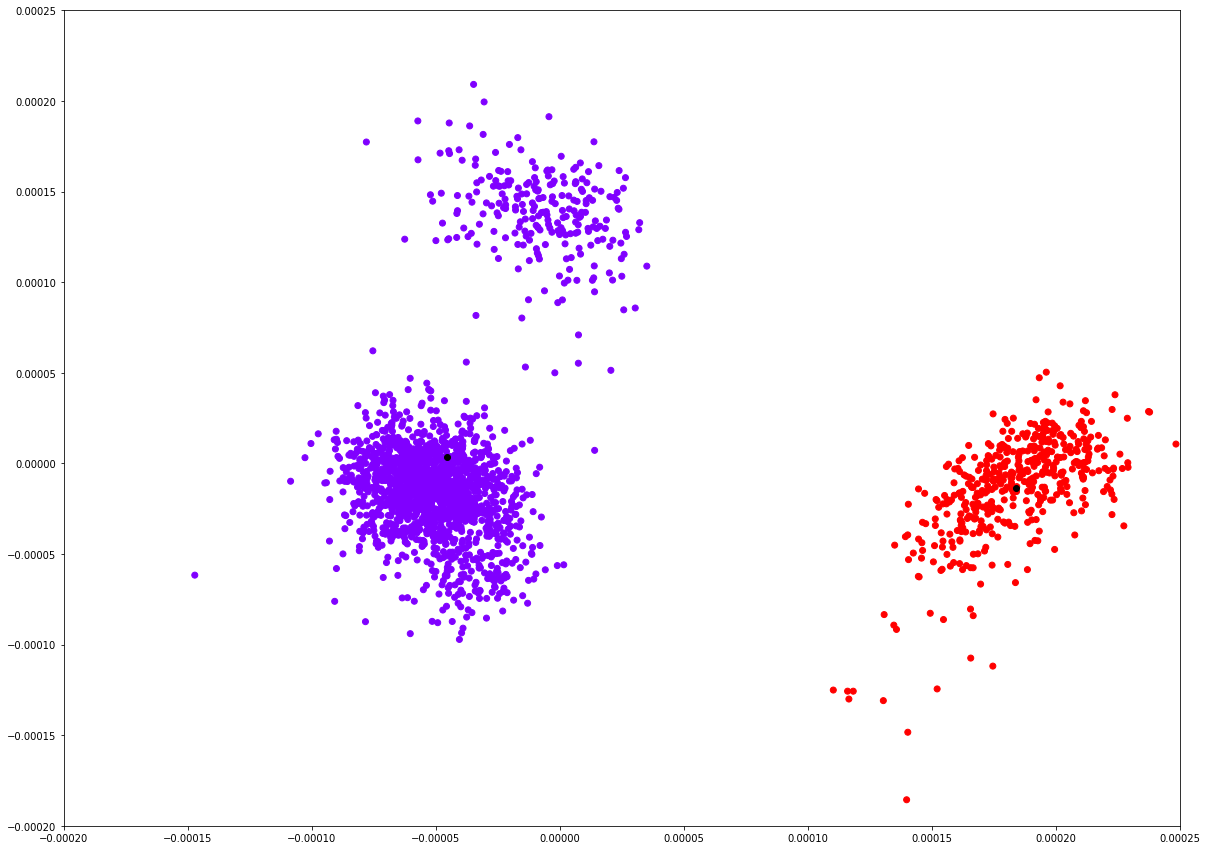

In [473]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(FeatureSpace_1_5)
plot_kmeans(FeatureSpace_1_5, 'Electrode1_5_kmeans', kmeans.labels_, kmeans.cluster_centers_)

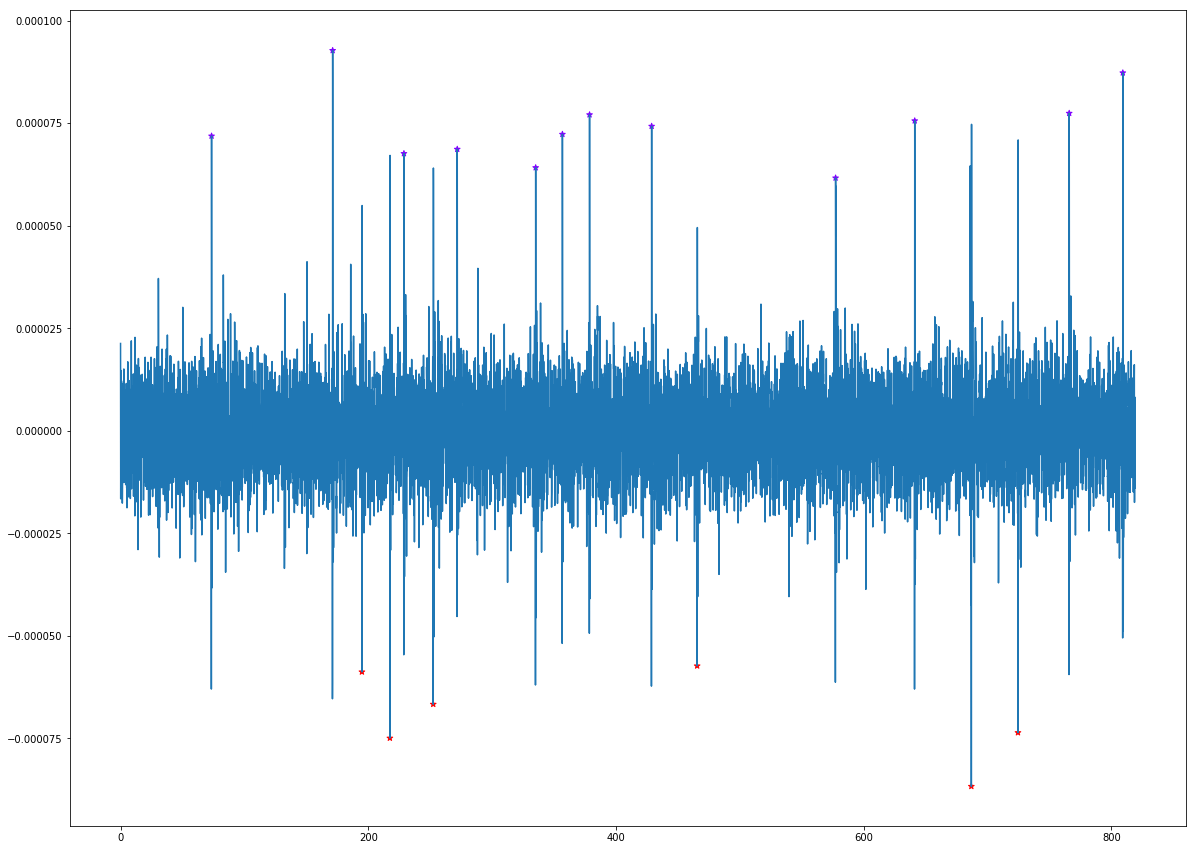

In [474]:
plot_data_with_stars(electrode1_values, samplestime, peaksindices_list, kmeans.labels_, 'DetectedSpikes_1_5', 20000)

Shape of aligned_arr: (2, 48)


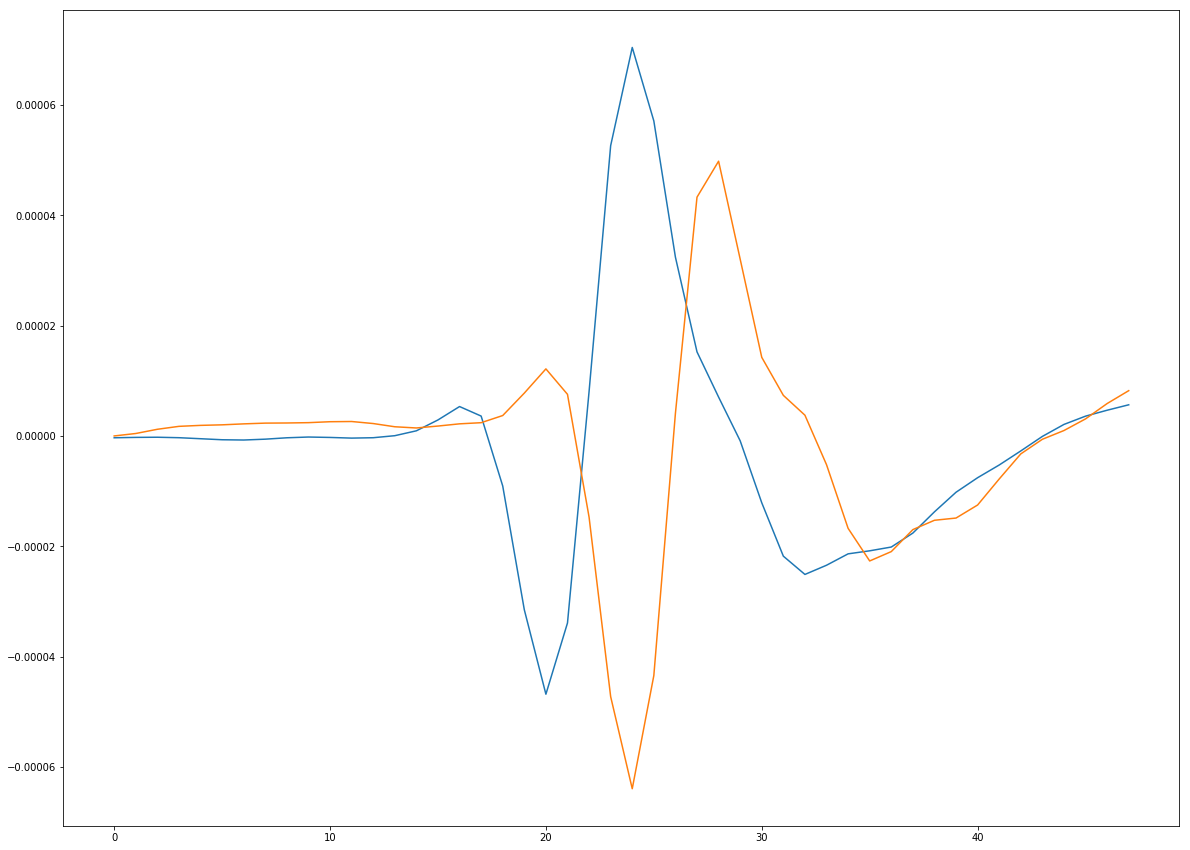

In [475]:
templates_1_5 = get_templates(aligned_electrode1_5, kmeans.labels_)
plot_aligned(templates_1_5, 'templates_1_5')

**Algorithm for Electrode2 with 3.5*std1 threshold**

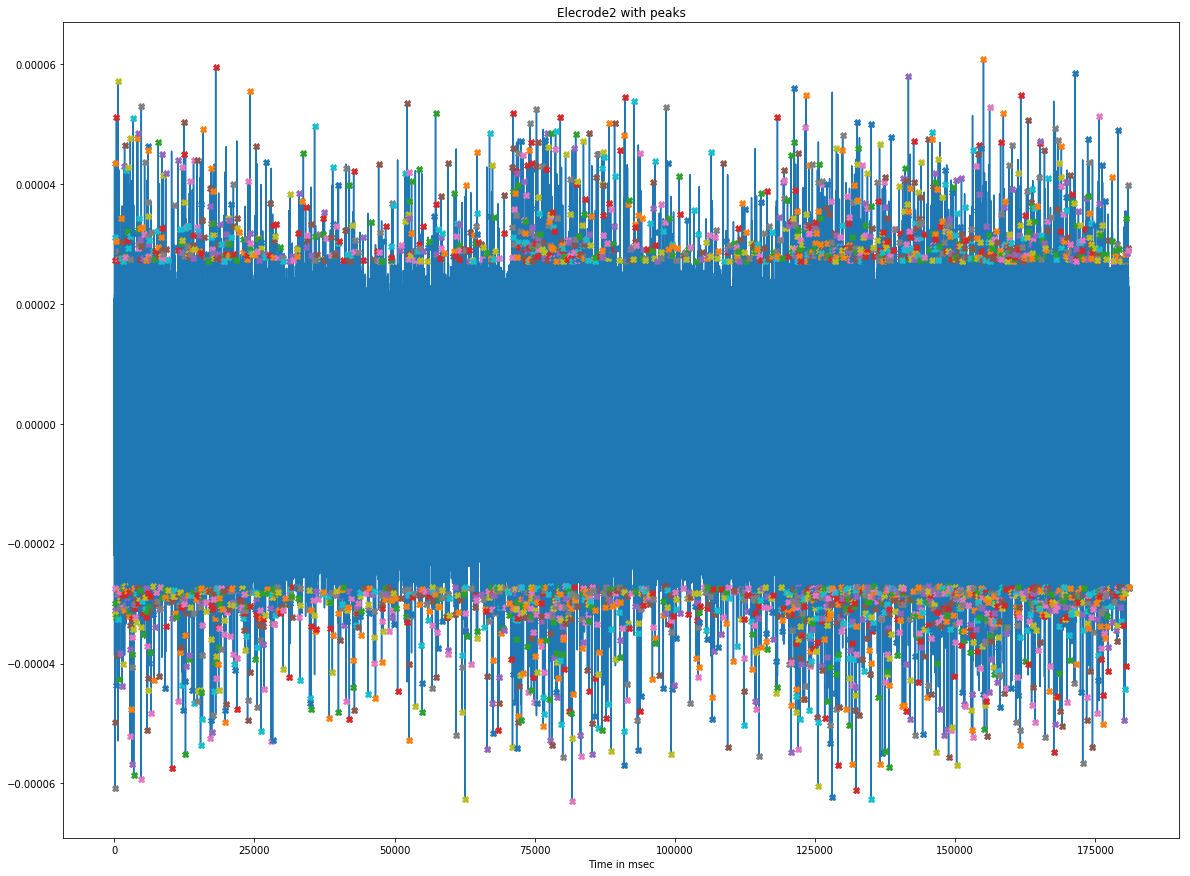

In [476]:
peaksindices_list = get_spike(np.abs(electrode2_values), std2*3.5) # Getting peaks for rectified data
plot_peaks_with_data(electrode2_values, samplestime, peaksindices_list, 'Elecrode2 with peaks')

Shape of aligned_arr: (3071, 48)


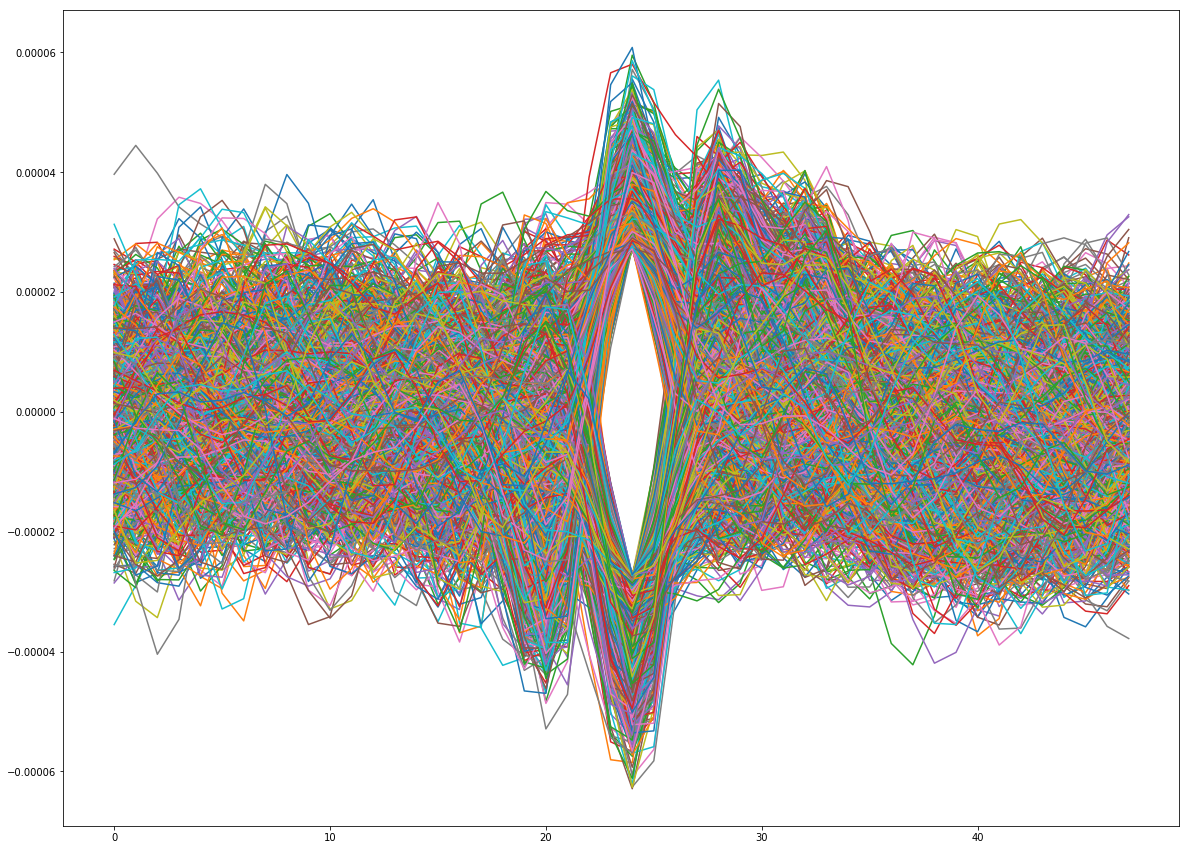

In [477]:
aligned_electrode2_3_5 = alignement(peaksindices_list, electrode2_values)
plot_aligned(aligned_electrode2_3_5, 'aligned_electrode2_3_5')

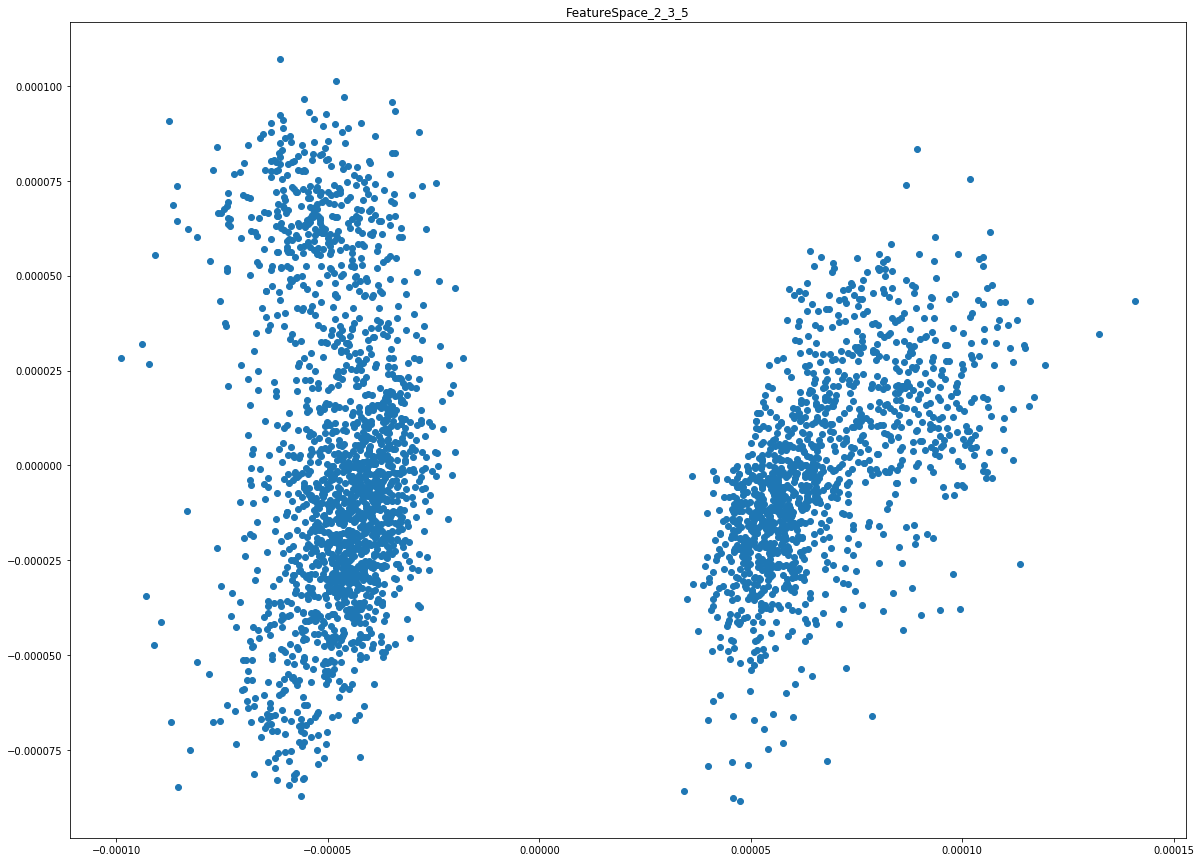

In [478]:
pca = PCA(n_components=2)
FeatureSpace_2_3_5 = pca.fit_transform(aligned_electrode2_3_5)
plot_pca(FeatureSpace_2_3_5[:, 0], FeatureSpace_2_3_5[:, 1], 'FeatureSpace_2_3_5')

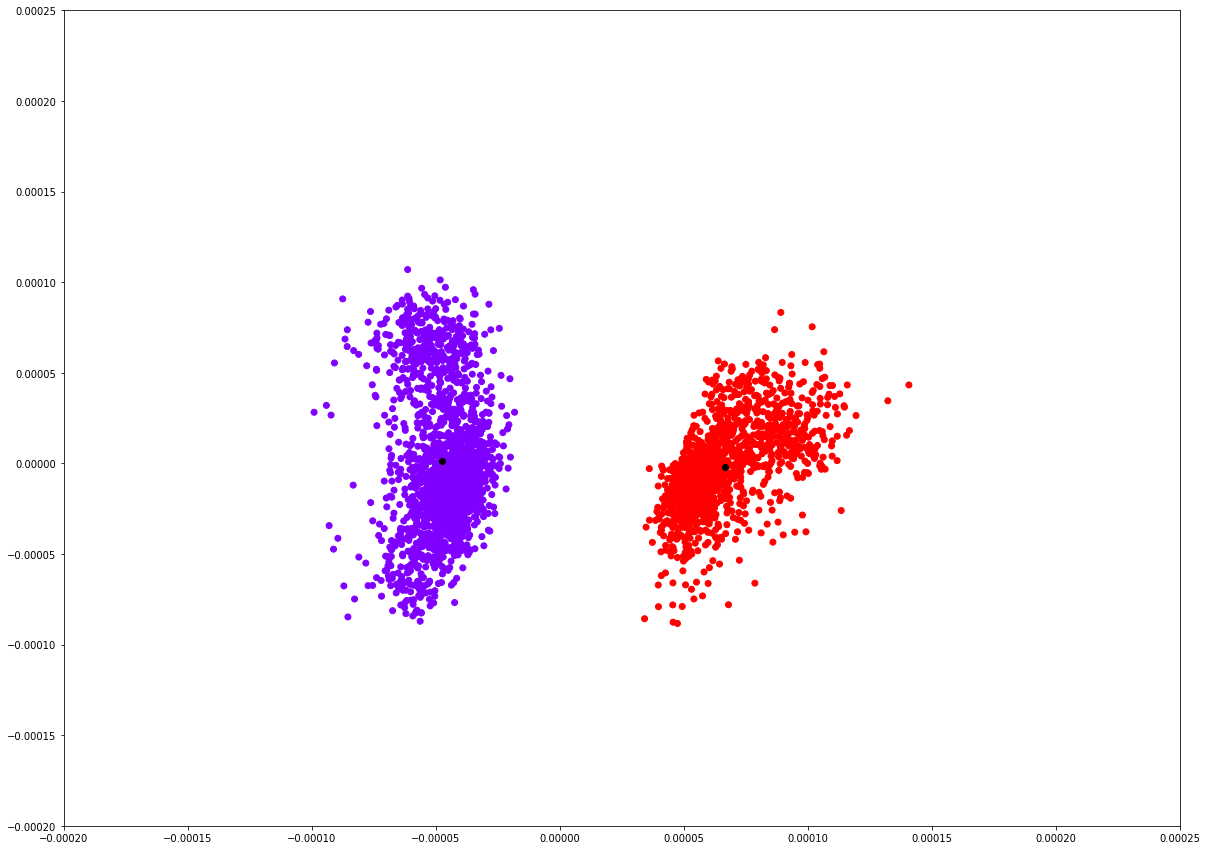

In [479]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(FeatureSpace_2_3_5)
#for i in range(len(FeatureSpace_2_3_5)):
#    print(FeatureSpace_2_3_5[i], kmeans.labels_[i])
plot_kmeans(FeatureSpace_2_3_5, 'Electrode2_3_5_kmeans', kmeans.labels_, kmeans.cluster_centers_)

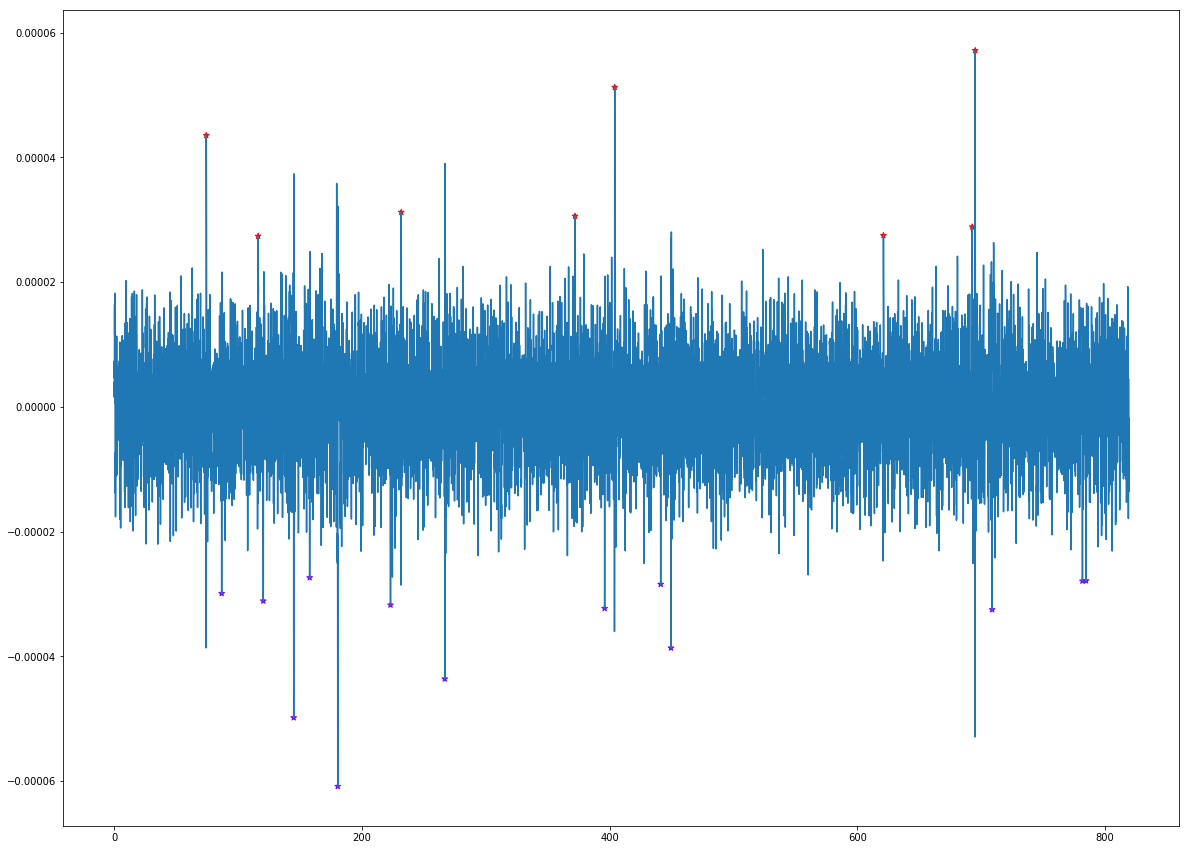

In [480]:
plot_data_with_stars(electrode2_values, samplestime, peaksindices_list, kmeans.labels_, 'DetectedSpikes_2_3_5', 20000)

Shape of aligned_arr: (2, 48)


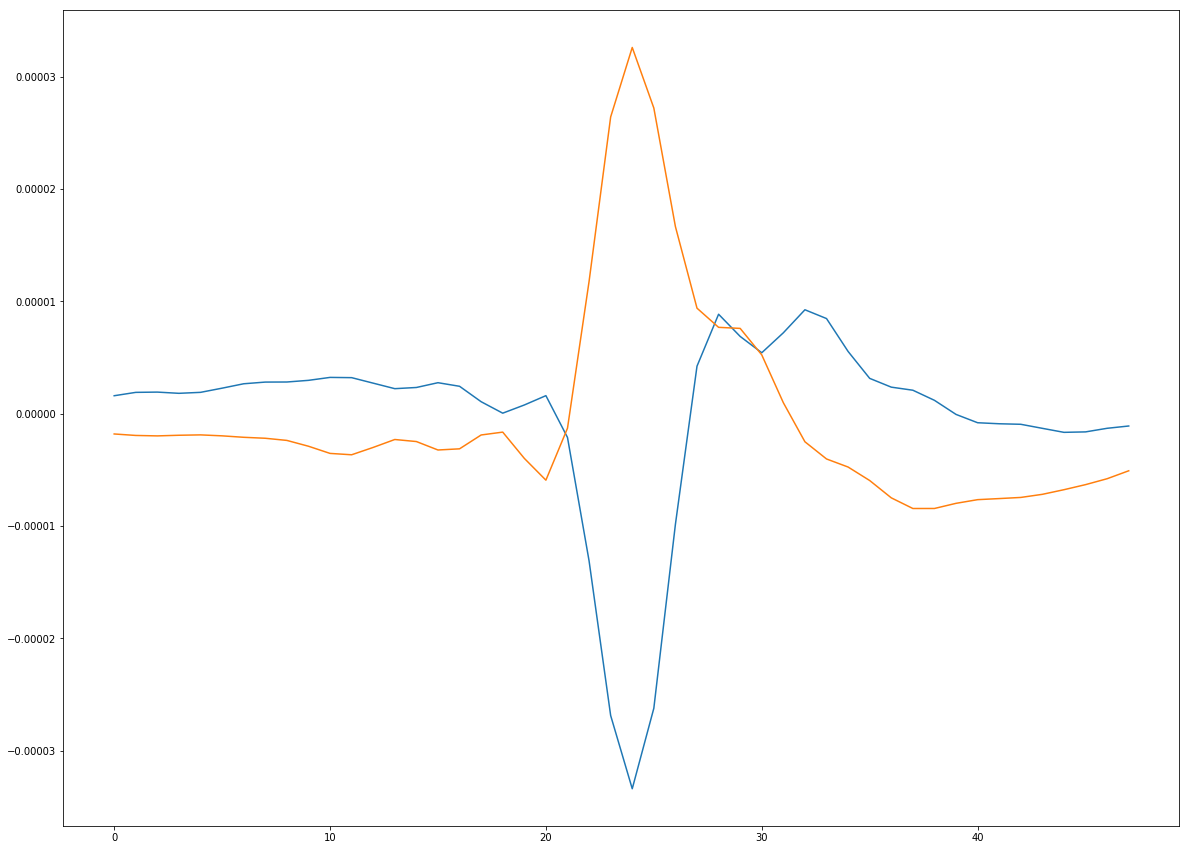

In [481]:
templates_2_3_5 = get_templates(aligned_electrode2_3_5, kmeans.labels_)
plot_aligned(templates_2_3_5, 'templates_2_3_5')

**Algorithm for Electrode2 with 5*std2 threshold**

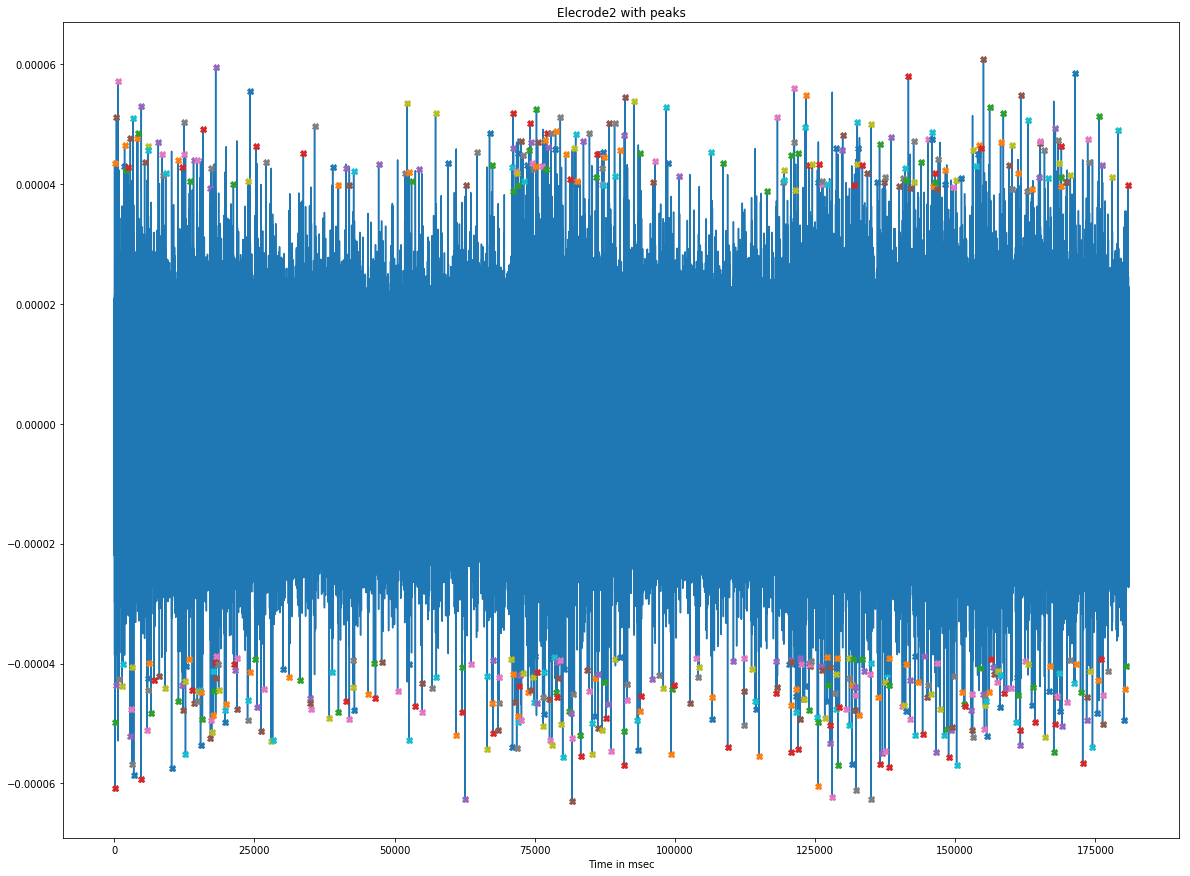

In [482]:
peaksindices_list = get_spike(np.abs(electrode2_values), std2*5) # Getting peaks for rectified data
plot_peaks_with_data(electrode2_values, samplestime, peaksindices_list, 'Elecrode2 with peaks')

Shape of aligned_arr: (553, 48)


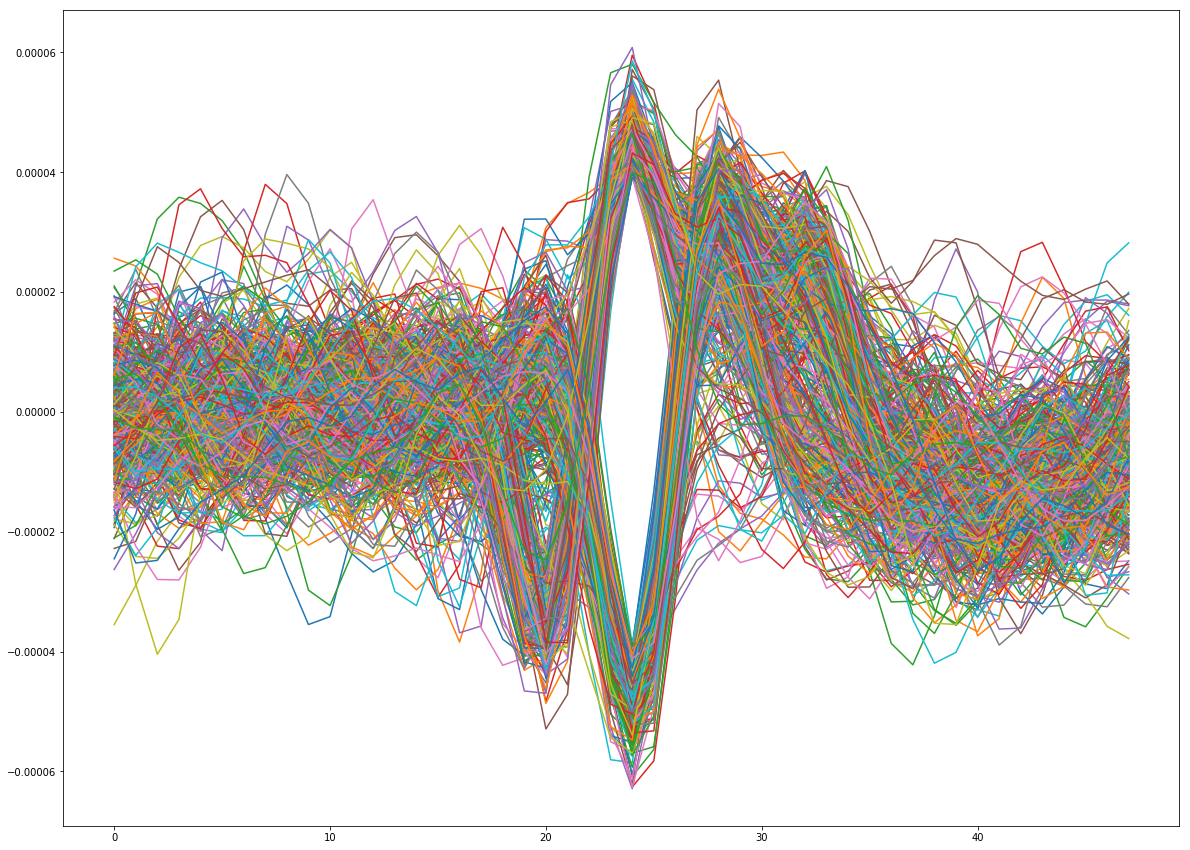

In [483]:
aligned_electrode2_5 = alignement(peaksindices_list, electrode2_values)
plot_aligned(aligned_electrode2_5, 'aligned_electrode2_5')

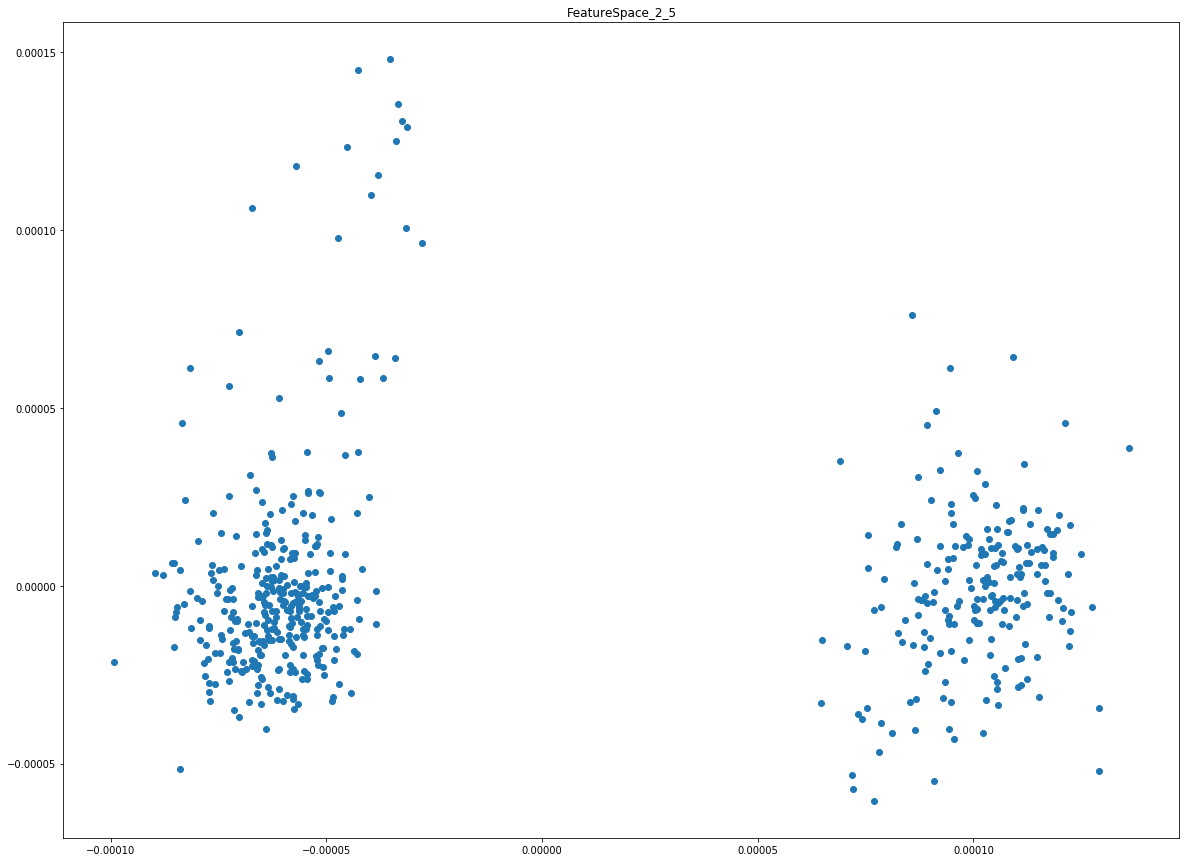

In [484]:
pca = PCA(n_components=2)
FeatureSpace_2_5 = pca.fit_transform(aligned_electrode2_5)
plot_pca(FeatureSpace_2_5[:, 0], FeatureSpace_2_5[:, 1], 'FeatureSpace_2_5')

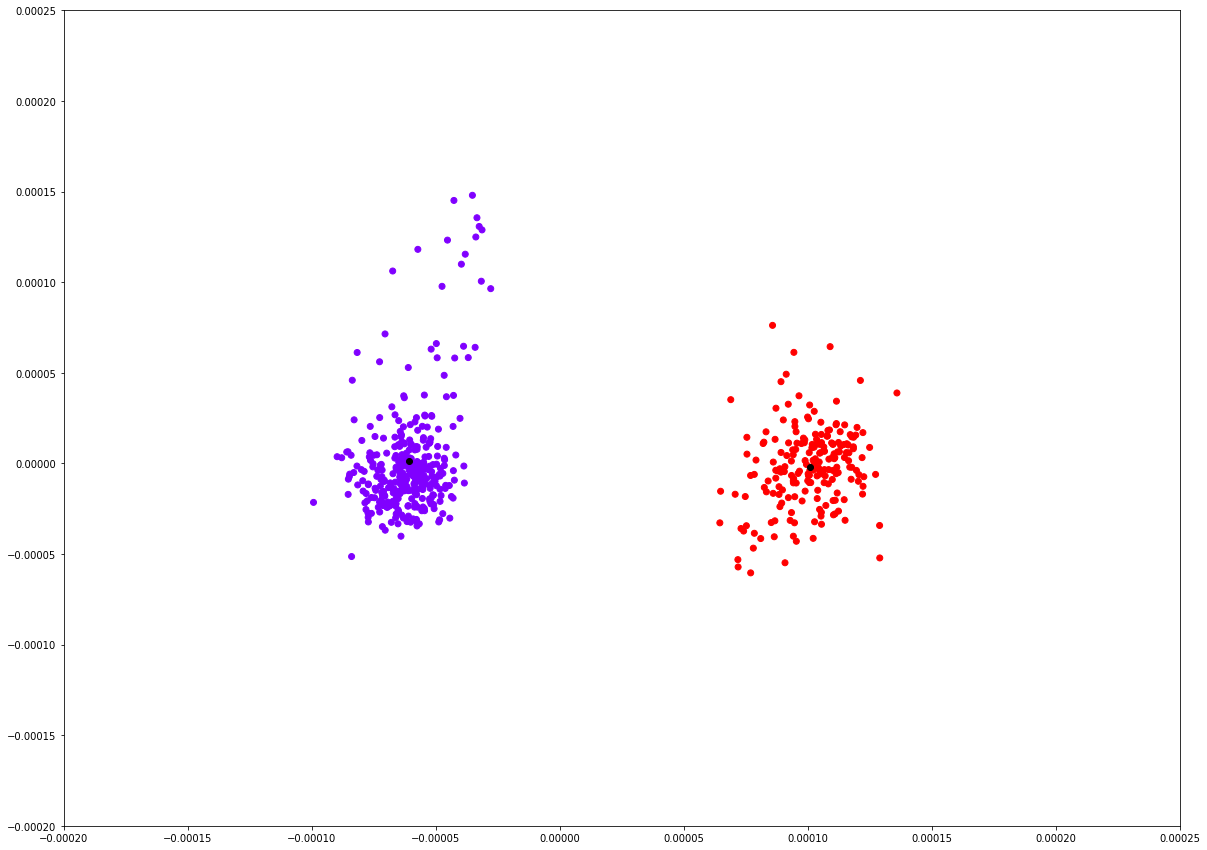

In [485]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(FeatureSpace_2_5)
plot_kmeans(FeatureSpace_2_5, 'Electrode2_5_kmeans', kmeans.labels_, kmeans.cluster_centers_)

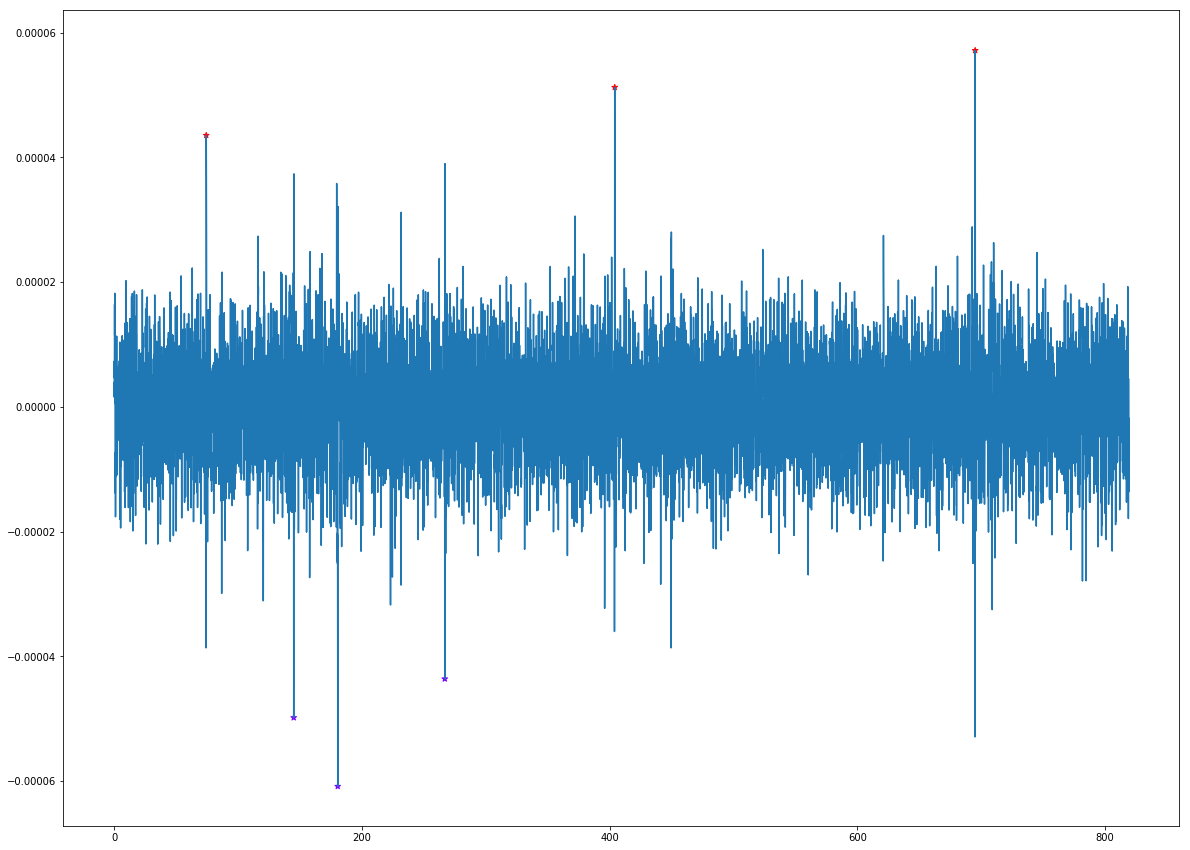

In [486]:
plot_data_with_stars(electrode2_values, samplestime, peaksindices_list, kmeans.labels_, 'DetectedSpikes_2_5', 20000)

Shape of aligned_arr: (2, 48)


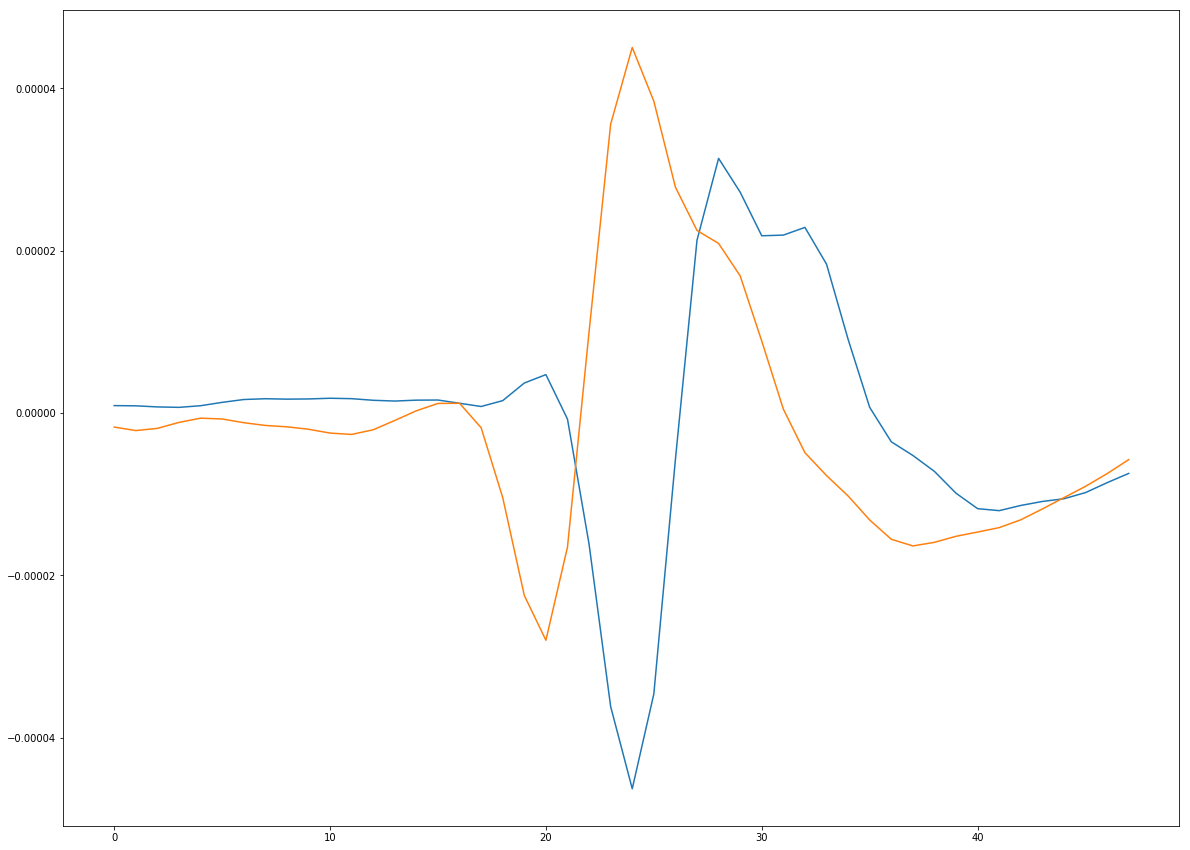

In [487]:
templates_2_5 = get_templates(aligned_electrode2_5, kmeans.labels_)
plot_aligned(templates_2_5, 'templates_2_5')